# Exlore Zipf's Law

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
sns.set()
%matplotlib inline

In [3]:
data_dir = '/home/rca2t/Public/ETA/data'
vocab = pd.read_csv(data_dir + '/austen-vocab.csv', index_col='term_id')

In [4]:
vocab.head()

,term_str,term_count,tf,len
term_id,,,,
0,0,2,0.000003,1
1,000,3,0.000004,3
2,1,2,0.000003,1
3,10,6,0.000008,2
4,10th,1,0.000001,4


# Recall Word Frequency Distribution

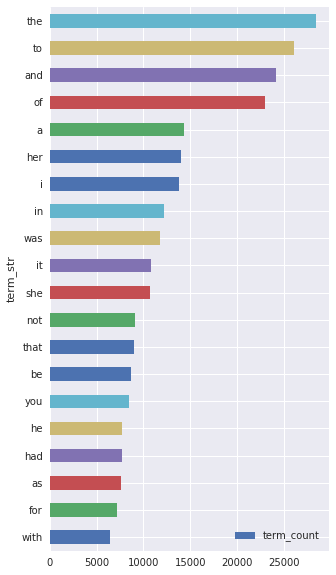

In [5]:
vocab.sort_values('term_count').tail(20).plot(kind='barh', x='term_str', y='term_count', figsize=(5,10))

# Zipf's Law

$f \propto \frac{1}{r} $

$k =  fr$

# Add Rank

In [6]:
if 'term_rank' not in vocab.columns:
    vocab = vocab.sort_values('term_count', ascending=False).reset_index()
    vocab.index.name = 'term_rank'
    vocab = vocab.reset_index()
    vocab = vocab.set_index('term_id')
    vocab['term_rank'] = vocab['term_rank'] + 1

In [7]:
vocab['zipf_k'] = vocab.term_count * vocab.term_rank

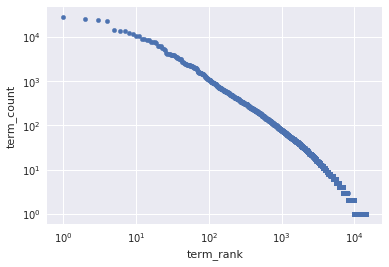

In [8]:
vocab.plot(kind='scatter', x='term_rank', y='term_count', logx=True, logy=True)

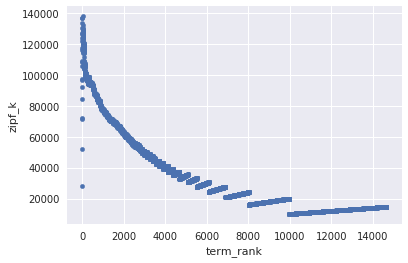

In [9]:
vocab.plot.scatter(x='term_rank', y='zipf_k', logx=False, logy=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b58e02160>]],
      dtype=object)

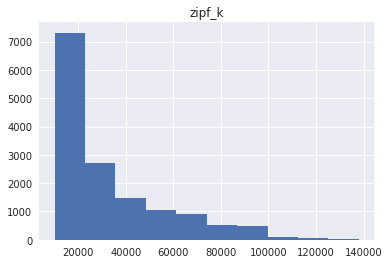

In [10]:
vocab.hist('zipf_k')

In [11]:
vocab.describe().T

,count,mean,std,min,25%,50%,75%,max
term_rank,14660.0,7330.500000,4232.121808,1.000000,3665.750000,7330.500000,10995.250000,14660.000000
term_count,14660.0,53.726057,580.359102,1.000000,1.000000,3.000000,12.000000,28392.000000
tf,14660.0,0.000068,0.000737,0.000001,0.000001,0.000004,0.000015,0.036048
len,14660.0,7.694407,2.473834,1.000000,6.000000,8.000000,9.000000,19.000000
zipf_k,14660.0,32248.154434,23979.407914,9975.000000,13639.750000,22831.500000,42999.000000,138050.000000


In [13]:
vocab[['term_rank', 'zipf_k']].to_csv(data_dir + '/austen-vocab-zipf.csv')

# Observations

* Zipf's law not followed in strict terms
* However, word distributions are not Gaussian -- they follow a power law similar to Pareto's
  *  This seems to be a general pattern with cultural phenomena.
* The question of significance remains -- how do we detect which words  are significant?
* Also, can we use these data to predict word usage?